<a href="https://colab.research.google.com/github/Mathurshab2210/Ml_with_Mathur/blob/main/breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score,precision_score,recall_score,f1_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
df=pd.read_csv('/content/data.csv')

In [3]:
df.head()

,id,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.isna().sum()

id                         0
diagnosis                  0
Radius_mean                0
Texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
df= df.drop_duplicates()

In [6]:
df.shape

(569, 32)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   Radius_mean              569 non-null    float64
 3   Texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

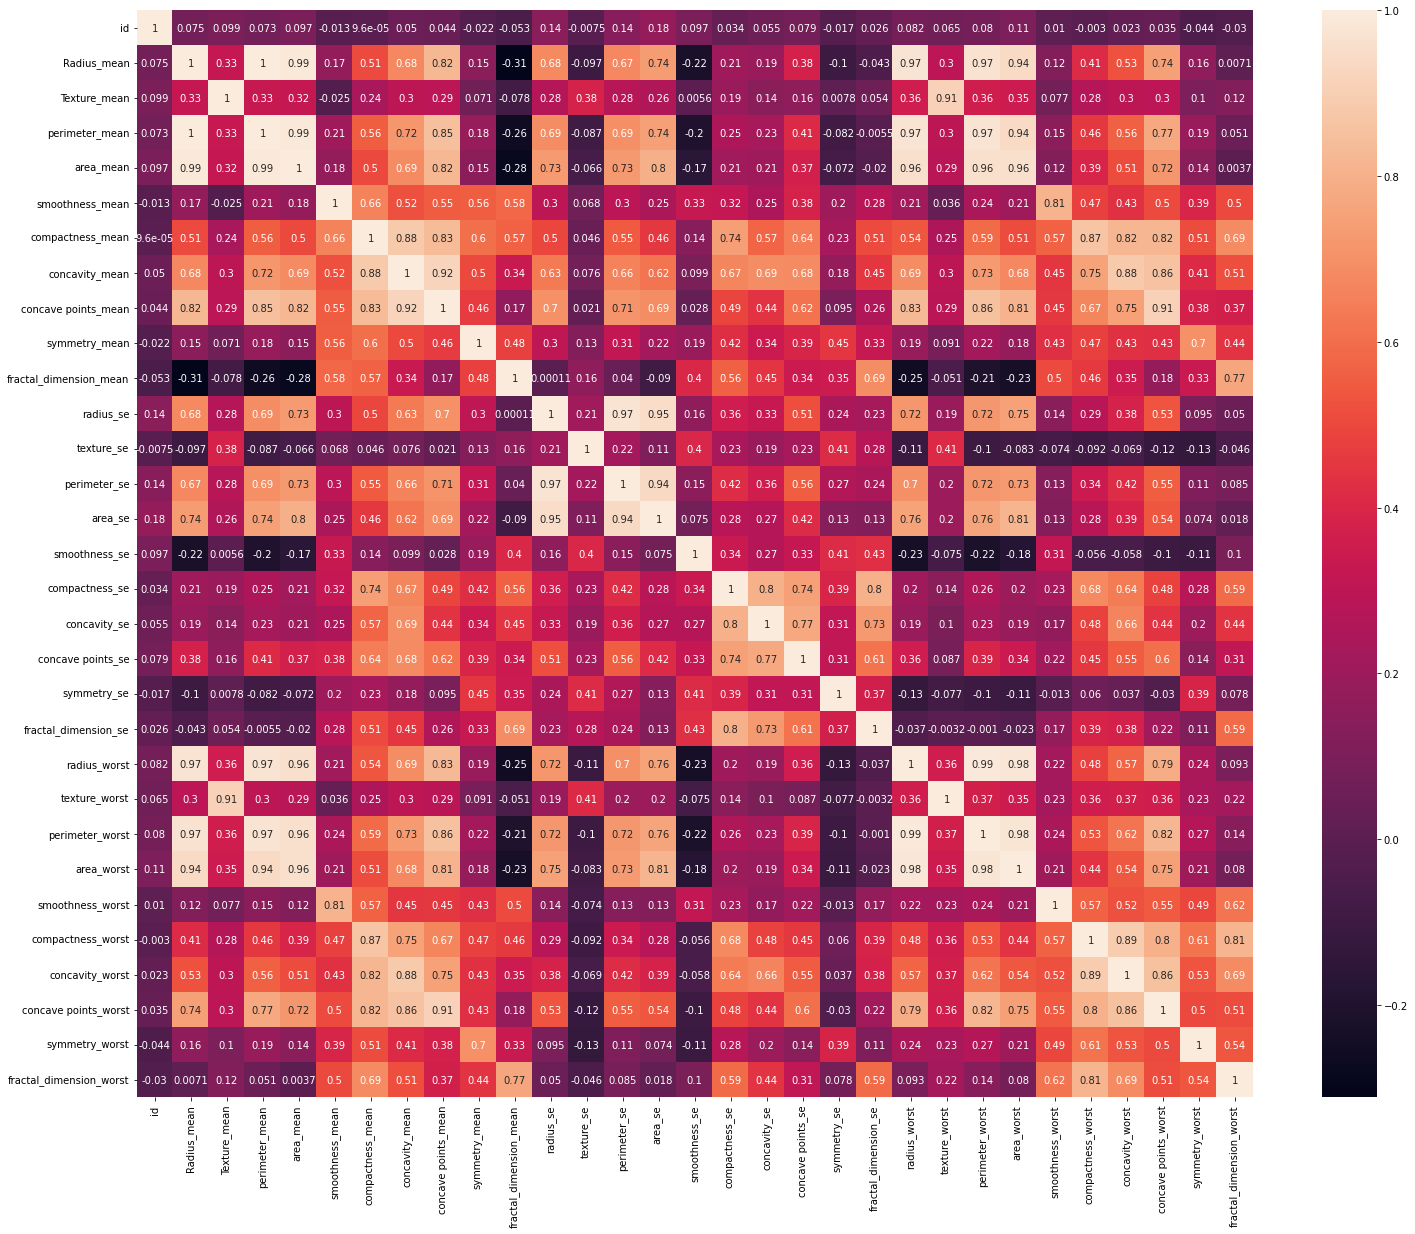

In [8]:
plt.figure(figsize=(25,20))
sns.heatmap(data=df.corr(), annot=True)

In [9]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [10]:
df['diagnosis']=lb.fit_transform(df['diagnosis'])

In [11]:
df.head()

,id,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
df=df.drop('id',axis=1)

In [13]:
df.head()

,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
x=df.drop('diagnosis',axis=1)
y=df['diagnosis']

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=3)

In [19]:
x_train.shape

(455, 30)

In [22]:
model=SVC()

In [23]:
model

SVC()

In [24]:
model.fit(x_train,y_train)

SVC()

In [26]:
model_score=cross_val_score(model,x,y,cv=10)

In [29]:
import numpy as  np

In [32]:
np.average(model_score)

0.9138784461152882

In [33]:
from sklearn.model_selection import cross_val_predict

In [34]:
y_train_pred=cross_val_predict(model,x_train,y_train,cv=10)

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
confusion_matrix(y_train,y_train_pred)

array([[279,   6],
       [ 35, 135]])

In [37]:
precision_score(y_train,y_train_pred, average='micro')

0.9098901098901099

In [38]:
r2_score(y_train,y_train_pred)

0.6149638802889577

In [39]:
#test data

In [40]:
y_test_pred=cross_val_predict(model,x_test,y_test,cv=10)

In [42]:
confusion_matrix(y_test,y_test_pred)

array([[71,  1],
       [12, 30]])

In [43]:
r2_score(y_test,y_test_pred)

0.5099206349206347

In [44]:
f1_score(y_test,y_test_pred)

0.821917808219178

In [45]:
recall_score(y_test,y_test_pred)

0.7142857142857143

In [ ]:
#Random forest

In [77]:
modelr= RandomForestClassifier()

In [78]:
modelr

RandomForestClassifier()

In [79]:
modelr.fit(x_train,y_train)

RandomForestClassifier()

In [80]:
model_score=cross_val_score(modelr,x,y,cv=10)

In [81]:
import numpy as  np

In [82]:
np.average(model_score)

0.9525689223057643

In [83]:
from sklearn.model_selection import cross_val_predict

In [84]:
y_train_pred=cross_val_predict(modelr,x_train,y_train,cv=10)

In [85]:
from sklearn.metrics import confusion_matrix

In [86]:
confusion_matrix(y_train,y_train_pred)

array([[275,  10],
       [ 13, 157]])

In [87]:
precision_score(y_train,y_train_pred, average='micro')

0.9494505494505494

In [88]:
r2_score(y_train,y_train_pred)

0.7840041279669763

In [89]:
#test data

In [90]:
y_test_pred=cross_val_predict(modelr,x_test,y_test,cv=10)

In [91]:
confusion_matrix(y_test,y_test_pred)

array([[70,  2],
       [ 5, 37]])

In [92]:
r2_score(y_test,y_test_pred)

0.7361111111111109

In [93]:
f1_score(y_test,y_test_pred)

0.9135802469135802

In [94]:
recall_score(y_test,y_test_pred)

0.8809523809523809

In [95]:
precision_score(y_test,y_test_pred)

0.9487179487179487

In [98]:
prediction=model.predict(x[2:3])

In [99]:
if prediction ==1:
  print('malignant (cancer) posiibility')
else:
  print('benign  possibolity')

malignant (cancer) posiibility
